<a href="https://colab.research.google.com/github/aiformankind/covid-19-hackathon/blob/master/Covid_19_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Data Exploration

In [390]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

Since elderly population is a high risk group, we compute the population distribution of people > 60 year old by counties in California.

We also would like to examine how many ICU beds availble by counties in California and determine how many percent of elderly population can afford an ICU bed before they have to start sharing one.

To do the study, we found a dataset from California Health and Human Service Open Data Portal which shows the bed types and bed type capacities that are associated with California healthcare facilities that are operational and have a current license issued by the CDPH and/or a current U.S. Department of Health and Human Services’ Centers for Medicare and Medicaid Services (CMS) certification. Data updated: March 10, 2020. You can find the data from below link.

https://data.chhs.ca.gov/dataset/healthcare-facility-bed-types-and-counts/resource/0997fa8e-ef7c-43f2-8b9a-94672935fa60

Disclaimer: Since we do not know the accuray of the data, we assumes no responsibility for errors or omissions. Please use this study as your own risk. AI For Mankind shall not be held liable for any use or misuse of the data. 


In [391]:
import pandas as pd

hospital_beds_df = pd.read_csv('https://raw.githubusercontent.com/aiformankind/covid-19-hackathon/master/HEALTH_FAC_BEDS_20200310.csv', skiprows=0, thousands=',')
hospital_beds_df.head(10)

,FACID,FACNAME,FAC_FDR,BED_CAPACITY_TYPE,BED_CAPACITY,COUNTY_NAME
0,10000001,VINEYARD POST ACUTE,SKILLED NURSING FACILITY,SKILLED NURSING,99,SONOMA
1,10000003,CREEKSIDE REHABILITATION & BEHAVIORAL HEALTH,SKILLED NURSING FACILITY,SPECIAL TREATMENT PROGRAM,58,SONOMA
2,10000003,CREEKSIDE REHABILITATION & BEHAVIORAL HEALTH,SKILLED NURSING FACILITY,SKILLED NURSING,123,SONOMA
3,10000004,CRESCENT CITY SKILLED NURSING,SKILLED NURSING FACILITY,SKILLED NURSING,99,DEL NORTE
4,10000005,WINDSOR CARE CENTER OF PETALUMA,SKILLED NURSING FACILITY,SKILLED NURSING,79,SONOMA
5,10000022,FRIENDS HOUSE,SKILLED NURSING FACILITY,SKILLED NURSING,34,SONOMA
6,10000024,"GRANADA REHAB & WELLNESS CENTER, LP",SKILLED NURSING FACILITY,SKILLED NURSING,87,HUMBOLDT
7,10000026,APPLE VALLEY POST-ACUTE REHAB,SKILLED NURSING FACILITY,SKILLED NURSING,95,SONOMA
8,10000028,EMPRES POST ACUTE REHABILITATION,SKILLED NURSING FACILITY,SKILLED NURSING,98,SONOMA
9,10000029,HEALDSBURG SENIOR LIVING COMMUNITY,SKILLED NURSING FACILITY,SKILLED NURSING,38,SONOMA


Show Different Bed Types

In [392]:
hospital_beds_df['BED_CAPACITY_TYPE'].unique()


array(['SKILLED NURSING', 'SPECIAL TREATMENT PROGRAM',
       'INTERMEDIATE CARE/DD HABILITATIVE',
       'INTERMEDIATE CARE/DD NURSING',
       'CONGREGATE LIVING HEALTH FACILITY', 'INTERMEDIATE CARE',
       'HOSPICE', 'CORONARY CARE', 'INTENSIVE CARE',
       'INTENSIVE CARE NEWBORN NURSERY', 'PERINATAL',
       'UNSPECIFIED GENERAL ACUTE CARE', 'BURN', 'PEDIATRIC',
       'RENAL TRANSPLANT', 'REHABILITATION', 'ACUTE RESPIRATORY CARE',
       'ACUTE PSYCHIATRIC CARE', 'CHEMICAL DEPENDENCY RECOVERY',
       'PEDIATRIC INTENSIVE CARE UNIT', 'LABOR AND DELIVERY',
       'INTERMEDIATE CARE/DD', 'PSYCHIATRIC HEALTH',
       'PEDI. DAY & RESPITE CARE', 'DIALYSIS STATIONS',
       'CORRECTIONAL TREATMENT CENTER'], dtype=object)

Select Intensive Care or Acute Respiratory Care beds

In [393]:
icu_beds_df = hospital_beds_df[(hospital_beds_df.BED_CAPACITY_TYPE=='INTENSIVE CARE') | (hospital_beds_df.BED_CAPACITY_TYPE=='ACUTE RESPIRATORY CARE') ]
icu_beds_df

,FACID,FACNAME,FAC_FDR,BED_CAPACITY_TYPE,BED_CAPACITY,COUNTY_NAME
191,30000037,METHODIST HOSPITAL OF SACRAMENTO,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,10,SACRAMENTO
212,30000108,SUTTER AMADOR HOSPITAL,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,6,AMADOR
216,30000109,SUTTER AUBURN FAITH HOSPITAL,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,4,PLACER
220,30000113,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,116,SACRAMENTO
227,30000114,BARTON MEMORIAL HOSPITAL,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,8,EL DORADO
...,...,...,...,...,...,...
4137,930000290,KAISER FOUNDATION HOSPITAL - WOODLAND HILLS,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,22,LOS ANGELES
4198,930000912,KECK HOSPITAL OF USC,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,84,LOS ANGELES
4223,930001543,KAISER FOUNDATION HOSPITAL - BALDWIN PARK,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,12,LOS ANGELES
4240,930001607,KINDRED HOSPITAL - SANTA ANA,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,7,ORANGE


Group ICU Beds by County

As the numbers show below: we only have limited ICU beds. For Santa Clara County, we only have 438 ICU beds.

In [394]:
icu_beds_grouped_by_county = icu_beds_df.groupby('COUNTY_NAME')['BED_CAPACITY'].sum()
sorted_icu_beds_grouped_by_county = icu_beds_grouped_by_county.sort_values(ascending=False)
sorted_icu_beds_grouped_by_county.index = sorted_icu_beds_grouped_by_county.index.str.lower()
sorted_icu_beds_grouped_by_county.index = (sorted_icu_beds_grouped_by_county.index +' county').astype(str)
sorted_icu_beds_grouped_by_county

COUNTY_NAME
los angeles county        2145
orange county              614
san diego county           605
san bernardino county      486
santa clara county         438
riverside county           378
sacramento county          376
san francisco county       326
alameda county             291
contra costa county        169
kern county                155
fresno county              149
ventura county             123
san mateo county            96
stanislaus county           92
san joaquin county          90
solano county               82
santa barbara county        79
sonoma county               72
shasta county               70
tulare county               65
placer county               58
madera county               52
napa county                 48
san luis obispo county      48
butte county                47
marin county                30
monterey county             30
el dorado county            28
imperial county             28
humboldt county             26
merced county              

Plot of Number of ICU Beds across Counties in California

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text yticklabel objects>)

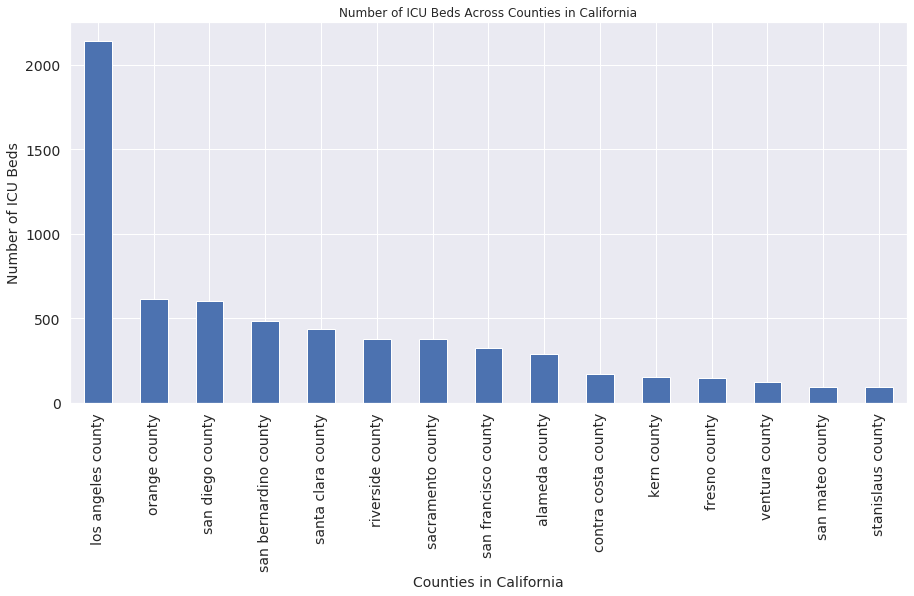

In [395]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sorted_icu_beds_grouped_by_county.iloc[0:15].plot.bar(ax=ax)
ax.set_xlabel('Counties in California', fontsize=14)
ax.set_title('Number of ICU Beds Across Counties in California')
ax.set_ylabel('Number of ICU Beds', fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

Since elderly population is a high risk group, we compute the population distribution of people > 60 year old in California. This will help us in emergency planning.

We found a population projection dataset from California's Department of Finance. http://www.dof.ca.gov/Forecasting/Demographics/Projections/



In [396]:
county_age_df = pd.read_csv('https://raw.githubusercontent.com/aiformankind/covid-19-hackathon/master/County_Age_Projection.csv', skiprows=2, thousands=',')
county_age_df.head(10)

,County,Age,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,...,Column163,Column164,Column165,Column166,Column167,Column168,Column169,Column170,Column171,Column172,Column173,Column174,Column175,Column176,Column177,Column178,Column179,Column180,Column181,Column182,Column183,Column184,Column185,Column186,Column187,Column188,Column189,Column190,Column191,Column192,Column193,Column194,Column195,Column196,Column197,Column198,Column199,Column200,Column201,Column202
0,Alameda County,0,19169.0,19413.0,19093.0,19398.0,19250.0,19290.0,19332.0,19182.0,18680.0,18878.0,18309.0,17939.0,17708.0,17488.0,17402.0,17344.0,17341.0,17358.0,17325.0,17234.0,17203.0,17218.0,17340.0,17338.0,17365.0,17538.0,17668.0,17854.0,18057.0,18289.0,18517.0,18617.0,18799.0,19002.0,19112.0,19084.0,18957.0,18848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda County,1,19387.0,19157.0,19400.0,19092.0,19395.0,19229.0,19287.0,19331.0,19192.0,18680.0,18849.0,18285.0,17899.0,17682.0,17465.0,17386.0,17331.0,17325.0,17343.0,17305.0,17223.0,17177.0,17200.0,17330.0,17328.0,17366.0,17534.0,17652.0,17840.0,18042.0,18288.0,18517.0,18610.0,18791.0,19001.0,19111.0,19089.0,18956.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda County,2,20156.0,19098.0,18955.0,19247.0,19000.0,19098.0,18663.0,18658.0,18823.0,18727.0,18384.0,18594.0,18297.0,17922.0,17643.0,17334.0,17129.0,17083.0,16916.0,16765.0,16799.0,16726.0,16680.0,16642.0,16746.0,16763.0,16763.0,16890.0,17076.0,17302.0,17402.0,17697.0,17951.0,18064.0,18228.0,18436.0,18458.0,18469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County,3,19614.0,20756.0,19791.0,19702.0,20129.0,19653.0,19770.0,19199.0,19221.0,19363.0,19202.0,18901.0,19021.0,18845.0,18476.0,18215.0,17888.0,17687.0,17689.0,17485.0,17297.0,17304.0,17295.0,17207.0,17140.0,17251.0,17321.0,17369.0,17404.0,17629.0,17909.0,17873.0,18253.0,18474.0,18584.0,18790.0,18998.0,19001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda County,4,19589.0,19669.0,20873.0,19961.0,19844.0,20323.0,19911.0,20086.0,19315.0,19308.0,19465.0,19295.0,19015.0,19062.0,18974.0,18621.0,18354.0,18105.0,17927.0,17924.0,17794.0,17573.0,17512.0,17673.0,17622.0,17543.0,17535.0,17585.0,17720.0,17732.0,18015.0,18273.0,18219.0,18638.0,18822.0,18937.0,19148.0,19392.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alameda County,5,19225.0,19634.0,20018.0,21054.0,20145.0,20036.0,20519.0,20065.0,20250.0,19546.0,19492.0,19637.0,19333.0,19051.0,19136.0,19168.0,18944.0,18576.0,18413.0,18444.0,18327.0,18249.0,18031.0,17902.0,18083.0,18014.0,18039.0,18045.0,18034.0,18120.0,18128.0,18527.0,18710.0,18636.0,19121.0,19264.0,19466.0,19638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alameda County,6,19002.0,18691.0,19309.0,19654.0,20682.0,19707.0,19617.0,20287.0,19834.0,19706.0,18970.0,18849.0,19027.0,18759.0,18441.0,18563.0,18745.0,18541.0,18149.0,18134.0,18307.0,18129.0,17983.0,17711.0,17456.0,17729.0,17624.0,17579.0,17616.0,17628.0,17575.0,17683.0,18096.0,18264.0,18239.0,18661.0,18799.0,19035.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [397]:
import pandas as pd
county_age_df = county_age_df.replace({'Age': '100+'}, '100')
pd.to_numeric(county_age_df['Age'])
pd.to_numeric(county_age_df['2020'])
county_age_df.head(202)

,County,Age,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,...,Column163,Column164,Column165,Column166,Column167,Column168,Column169,Column170,Column171,Column172,Column173,Column174,Column175,Column176,Column177,Column178,Column179,Column180,Column181,Column182,Column183,Column184,Column185,Column186,Column187,Column188,Column189,Column190,Column191,Column192,Column193,Column194,Column195,Column196,Column197,Column198,Column199,Column200,Column201,Column202
0,Alameda County,0,19169.0,19413.0,19093.0,19398.0,19250.0,19290.0,19332.0,19182.0,18680.0,18878.0,18309.0,17939.0,17708.0,17488.0,17402.0,17344.0,17341.0,17358.0,17325.0,17234.0,17203.0,17218.0,17340.0,17338.0,17365.0,17538.0,17668.0,17854.0,18057.0,18289.0,18517.0,18617.0,18799.0,19002.0,19112.0,19084.0,18957.0,18848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda County,1,19387.0,19157.0,19400.0,19092.0,19395.0,19229.0,19287.0,19331.0,19192.0,18680.0,18849.0,18285.0,17899.0,17682.0,17465.0,17386.0,17331.0,17325.0,17343.0,17305.0,17223.0,17177.0,17200.0,17330.0,17328.0,17366.0,17534.0,17652.0,17840.0,18042.0,18288.0,18517.0,18610.0,18791.0,19001.0,19111.0,19089.0,18956.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda County,2,20156.0,19098.0,18955.0,19247.0,19000.0,19098.0,18663.0,18658.0,18823.0,18727.0,18384.0,18594.0,18297.0,17922.0,17643.0,17334.0,17129.0,17083.0,16916.0,16765.0,16799.0,16726.0,16680.0,16642.0,16746.0,16763.0,16763.0,16890.0,17076.0,17302.0,17402.0,17697.0,17951.0,18064.0,18228.0,18436.0,18458.0,18469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County,3,19614.0,20756.0,19791.0,19702.0,20129.0,19653.0,19770.0,19199.0,19221.0,19363.0,19202.0,18901.0,19021.0,18845.0,18476.0,18215.0,17888.0,17687.0,17689.0,17485.0,17297.0,17304.0,17295.0,17207.0,17140.0,17251.0,17321.0,17369.0,17404.0,17629.0,17909.0,17873.0,18253.0,18474.0,18584.0,18790.0,18998.0,19001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda County,4,19589.0,19669.0,20873.0,19961.0,19844.0,20323.0,19911.0,20086.0,19315.0,19308.0,19465.0,19295.0,19015.0,19062.0,18974.0,18621.0,18354.0,18105.0,17927.0,17924.0,17794.0,17573.0,17512.0,17673.0,17622.0,17543.0,17535.0,17585.0,17720.0,17732.0,18015.0,18273.0,18219.0,18638.0,18822.0,18937.0,19148.0,19392.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Alpine County,96,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Alpine County,97,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,4.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [0]:
import pandas as pd
county_age_df['Age']=pd.to_numeric(county_age_df['Age'])

In [0]:
greater_than_sixty = county_age_df[county_age_df['Age'] >= 60]

In [400]:
greater_than_sixty[greater_than_sixty['County'].str.match('Alpine County')]['2020'].sum()

418.0

In [0]:
grouped_by_county = county_age_df[county_age_df['Age'] >= 60][['County','Age','2020']].groupby('County')['2020'].sum()
sorted_grouped_by_county = grouped_by_county.sort_values(ascending=False)

Distribution Plot of Population >= 60 year old by Counties in California

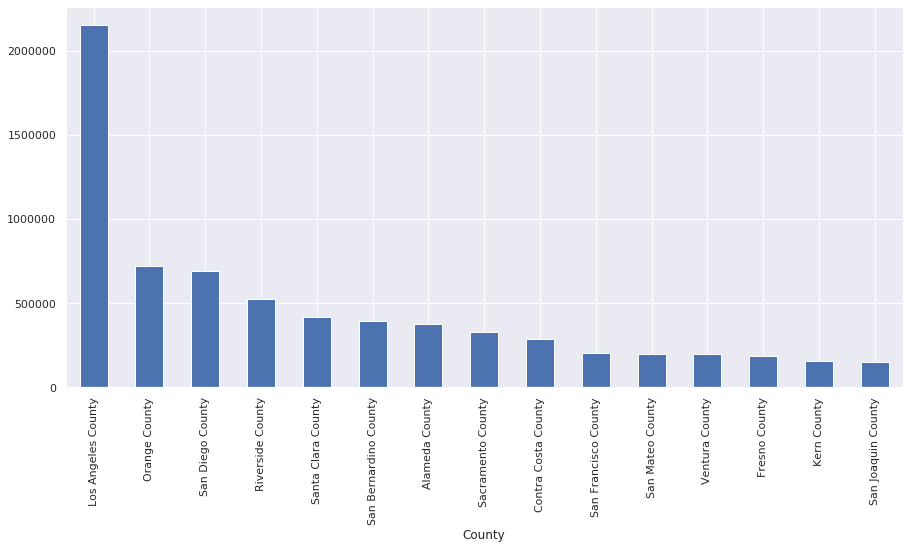

In [402]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sorted_grouped_by_county.iloc[0:15].plot.bar(ax=ax)

In [403]:
sorted_grouped_by_county

County
Los Angeles County        2152960.0
Orange County              717395.0
San Diego County           688677.0
Riverside County           525411.0
Santa Clara County         417912.0
San Bernardino County      392687.0
Alameda County             377472.0
Sacramento County          327733.0
Contra Costa County        285941.0
San Francisco County       205190.0
San Mateo County           197665.0
Ventura County             197639.0
Fresno County              182237.0
Kern County                156139.0
San Joaquin County         148223.0
Sonoma County              141367.0
Placer County              107029.0
Stanislaus County          104865.0
Solano County              104407.0
Santa Barbara County        96753.0
Monterey County             87896.0
Marin County                86143.0
Tulare County               82689.0
San Luis Obispo County      76867.0
Santa Cruz County           67628.0
El Dorado County            61438.0
Butte County                57513.0
Shasta County        

We saved and uploaded the above distribution of elderly population age 60 or more across counties in CA in the repo. Checkout https://github.com/aiformankind/covid-19-hackathon/blob/master/elderly_population_by_counties_ca.csv

In [404]:
sorted_icu_beds_grouped_by_county

COUNTY_NAME
los angeles county        2145
orange county              614
san diego county           605
san bernardino county      486
santa clara county         438
riverside county           378
sacramento county          376
san francisco county       326
alameda county             291
contra costa county        169
kern county                155
fresno county              149
ventura county             123
san mateo county            96
stanislaus county           92
san joaquin county          90
solano county               82
santa barbara county        79
sonoma county               72
shasta county               70
tulare county               65
placer county               58
madera county               52
napa county                 48
san luis obispo county      48
butte county                47
marin county                30
monterey county             30
el dorado county            28
imperial county             28
humboldt county             26
merced county              

In [0]:
sorted_grouped_by_county_lowercase = sorted_grouped_by_county

In [0]:
sorted_grouped_by_county_lowercase.index  = sorted_grouped_by_county.index.str.lower()

In [0]:
beds_for_elderly_population = pd.merge(sorted_grouped_by_county_lowercase, sorted_icu_beds_grouped_by_county, left_index=True, right_index=True)

In [408]:
beds_for_elderly_population = beds_for_elderly_population.rename(columns={"2020": "elderly_population", "BED_CAPACITY": "num_beds"})
beds_for_elderly_population

,elderly_population,num_beds
los angeles county,2152960.0,2145
orange county,717395.0,614
san diego county,688677.0,605
riverside county,525411.0,378
santa clara county,417912.0,438
san bernardino county,392687.0,486
alameda county,377472.0,291
sacramento county,327733.0,376
contra costa county,285941.0,169
san francisco county,205190.0,326


This shows the max percent of elderly population who can find an available ICU bed. This is the threshold before they have to start sharing ICU beds.

In [409]:
beds_for_elderly_population['max_percent_elderly'] =  beds_for_elderly_population['num_beds'] / beds_for_elderly_population['elderly_population']*100.0
beds_for_elderly_population

,elderly_population,num_beds,max_percent_elderly
los angeles county,2152960.0,2145,0.099630
orange county,717395.0,614,0.085587
san diego county,688677.0,605,0.087850
riverside county,525411.0,378,0.071944
santa clara county,417912.0,438,0.104807
san bernardino county,392687.0,486,0.123763
alameda county,377472.0,291,0.077092
sacramento county,327733.0,376,0.114728
contra costa county,285941.0,169,0.059103
san francisco county,205190.0,326,0.158877


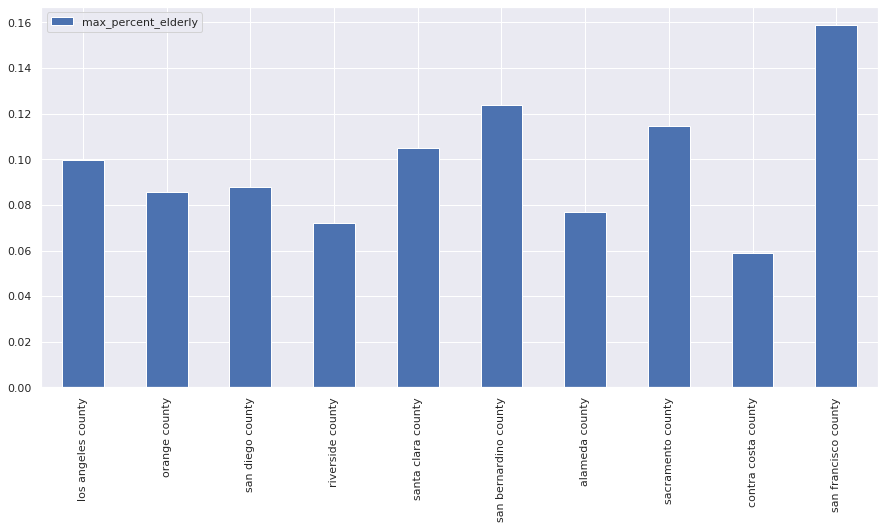

In [410]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
beds_for_elderly_population[['max_percent_elderly']].iloc[0:10].plot.bar(ax=ax)

In [411]:
!pip install -U plotly
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.5.4)


In [0]:
fips_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
ca_fips_df = fips_df[fips_df['STNAME'] == 'California']
joined = pd.merge(ca_fips_df[['FIPS','CTYNAME']], grouped_by_county, left_on='CTYNAME', right_on='County')

In [413]:
import numpy as np
import plotly.figure_factory as ff

values = joined['2020']
fips = joined['FIPS']

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(147, 147, 58)',
    'rgb(241, 241, 133)',
    'rgb(62, 85, 73)',
    'rgb(185, 161, 17)',
    'rgb(33, 164, 221)',
    'rgb(255, 186, 84)',
    'rgb(238, 66, 74)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[500, 10000, 20000, 50000, 100000, 200000, 300000, 500000,1000000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population', title='Population >= 60 Year Old in California'
)
fig.layout.template = None
fig.show()

![Population >= 60 Year Old](https://drive.google.com/uc?id=1MRvcj8qnKS6Es4ujLzywiqyYs2_q1jkU)

In [414]:
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [415]:
!head -5 COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990,990,
Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428,429,
Chongqing,Mainland China,30.0572,107.874,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,

In [416]:
!head -5 COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv

﻿Province/States,Country/Region,WHO region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
Confirmed,Globally,,282,314,581,846,1320,2014,2798,4593,6065,7818,9826,11953,14557,17391,20630,24554,28276,31481,34886,37558,40554,43103,45171,46997,49053,50580,51857,71429,73332,75204,75748,76769,77794,78811,79331,80239,81109,82294,83652,85403,87137,88948,90870
Confirmed,Mainland China,Western Pacific Region,278,309,571,830,1297,1985,2741,4537,5997,7736,9720,11821,14411,17238,20471,24363,28060,31211,34598,37251,40235,42708,44730,46550,48548,50054,51174,70635,72528,74280,74675,75569,76392,77042,77262,77780,78191,78630,78961,79394,79968,80174,80304
Confirmed,Outside of China,,4,5,10,16,23,29,57,56,68,82,106,132,146,153

In [417]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

In [418]:
covid_across_countries_df = pd.read_csv('COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv', skiprows=0)
covid_across_countries_df.head(10)

,Province/States,Country/Region,WHO region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,4593.0,6065.0,7818.0,9826.0,11953.0,14557.0,17391.0,20630.0,24554.0,28276.0,31481.0,34886.0,37558.0,40554.0,43103.0,45171.0,46997.0,49053.0,50580.0,51857.0,71429.0,73332.0,75204.0,75748.0,76769.0,77794.0,78811.0,79331.0,80239.0,81109.0,82294.0,83652.0,85403.0,87137.0,88948.0,90870.0
1,Confirmed,Mainland China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,7736.0,9720.0,11821.0,14411.0,17238.0,20471.0,24363.0,28060.0,31211.0,34598.0,37251.0,40235.0,42708.0,44730.0,46550.0,48548.0,50054.0,51174.0,70635.0,72528.0,74280.0,74675.0,75569.0,76392.0,77042.0,77262.0,77780.0,78191.0,78630.0,78961.0,79394.0,79968.0,80174.0,80304.0
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,56.0,68.0,82.0,106.0,132.0,146.0,153.0,159.0,191.0,216.0,270.0,288.0,307.0,319.0,395.0,441.0,447.0,505.0,526.0,683.0,794.0,804.0,924.0,1073.0,1200.0,1402.0,1769.0,2069.0,2459.0,2918.0,3664.0,4691.0,6009.0,7169.0,8774.0,10566.0
3,Suspected,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,5794.0,6973.0,9239.0,12167.0,15238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Severe,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,461.0,976.0,1239.0,1370.0,1527.0,1795.0,2110.0,2296.0,2788.0,3219.0,3859.0,4821.0,6101.0,6188.0,6484.0,7333.0,8204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Deaths,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,106.0,132.0,170.0,213.0,259.0,304.0,361.0,425.0,491.0,564.0,637.0,723.0,812.0,909.0,1017.0,1114.0,1260.0,1381.0,1524.0,1666.0,1772.0,1870.0,2006.0,2121.0,2239.0,2348.0,2445.0,2595.0,2666.0,2718.0,2747.0,2791.0,2838.0,2873.0,2915.0,2946.0
6,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7153.0,9074.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,34874.0,51968.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,62662.0,63454.0,64084.0,64287.0,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0
7,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,604.0,683.0,797.0,870.0,944.0,1018.0,1075.0,1120.0,1151.0,1177.0,1219.0,1241.0,1261.0,1295.0,1316.0,1322.0,1328.0,1331.0,1332.0,1333.0,1339.0,1342.0,1345.0,1347.0,1347.0,1347.0,1348.0,1349.0,1349.0,1350.0,1350.0
8,Henan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.0,493.0,566.0,675.0,764.0,851.0,914.0,981.0,1033.0,1073.0,1105.0,1135.0,1169.0,1184.0,1212.0,1231.0,1246.0,1257.0,1262.0,1265.0,1267.0,1270.0,1271.0,1271.0,1271.0,1271.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0
9,Zhejiang,China,Western Pacific Region,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.0,661.0,724.0,829.0,895.0,954.0,1006.0,1048.0,1075.0,1104.0,1117.0,1131.0,1145.0,1155.0,1162.0,1167.0,1171.0,1172.0,1173.0,1175.0,1203.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1206.0,1213.0


In [419]:
global_timeseries = covid_across_countries_df.iloc[0].iloc[3:]
global_timeseries.head(5)

1/21/20     282
1/22/20     314
1/23/20     581
1/24/20     846
1/25/20    1320
Name: 0, dtype: object

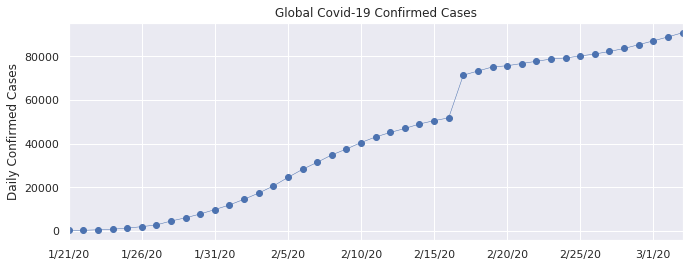

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries.plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('Global Covid-19 Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases');

In [421]:
global_timeseries = covid_across_countries_df.iloc[:2].T.iloc[3:]
global_timeseries.head(5)

,0,1
1/21/20,282,278
1/22/20,314,309
1/23/20,581,571
1/24/20,846,830
1/25/20,1320,1297


In [422]:
#pd.to_datetime(global_timeseries.iloc[:,0])
global_timeseries['global']=global_timeseries.iloc[:,0]
global_timeseries['USA']=global_timeseries.iloc[:,1]
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.head(5)


,global,USA
1/21/20,282,278
1/22/20,314,309
1/23/20,581,571
1/24/20,846,830
1/25/20,1320,1297


In [423]:
global_timeseries.index = pd.to_datetime(global_timeseries.index)
global_timeseries.head(5)

,global,USA
2020-01-21,282,278
2020-01-22,314,309
2020-01-23,581,571
2020-01-24,846,830
2020-01-25,1320,1297


Text(0, 0.5, 'Daily Confirmed Cases')

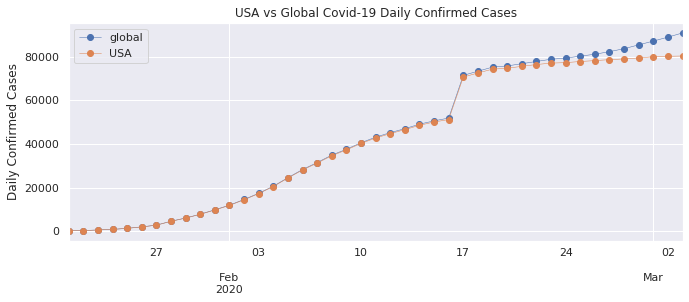

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()

cols = ['global', 'USA']
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries[cols].plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('USA vs Global Covid-19 Daily Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases')
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [425]:
global_timeseries['year'] = global_timeseries.index.year
global_timeseries['month'] = global_timeseries.index.month
global_timeseries['weekday'] = global_timeseries.index.weekday_name
global_timeseries.head(5)

,global,USA,year,month,weekday
2020-01-21,282,278,2020,1,Tuesday
2020-01-22,314,309,2020,1,Wednesday
2020-01-23,581,571,2020,1,Thursday
2020-01-24,846,830,2020,1,Friday
2020-01-25,1320,1297,2020,1,Saturday


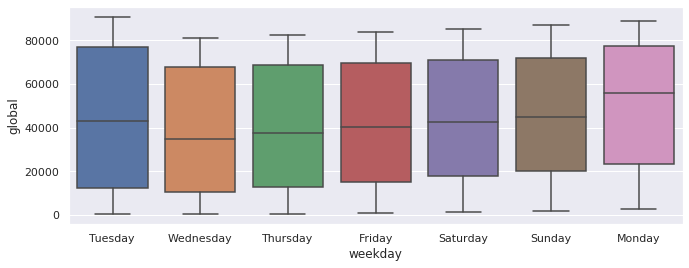

In [426]:
sns.boxplot(data=global_timeseries, x='weekday', y='global')

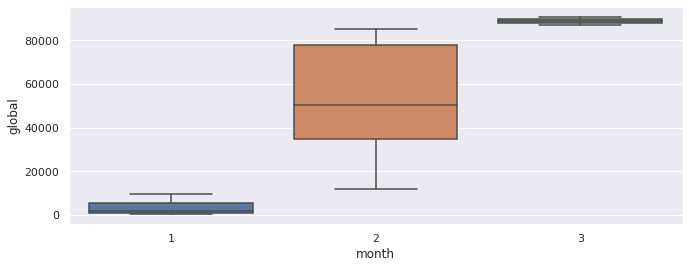

In [427]:
sns.boxplot(data=global_timeseries, x='month', y='global');

In [428]:
global_timeseries.head(10)

,global,USA,year,month,weekday
2020-01-21,282,278,2020,1,Tuesday
2020-01-22,314,309,2020,1,Wednesday
2020-01-23,581,571,2020,1,Thursday
2020-01-24,846,830,2020,1,Friday
2020-01-25,1320,1297,2020,1,Saturday
2020-01-26,2014,1985,2020,1,Sunday
2020-01-27,2798,2741,2020,1,Monday
2020-01-28,4593,4537,2020,1,Tuesday
2020-01-29,6065,5997,2020,1,Wednesday
2020-01-30,7818,7736,2020,1,Thursday


In [429]:
global_timeseries['date'] = global_timeseries.index.to_frame(index=True)
global_timeseries.head(10)

,global,USA,year,month,weekday,date
2020-01-21,282,278,2020,1,Tuesday,2020-01-21
2020-01-22,314,309,2020,1,Wednesday,2020-01-22
2020-01-23,581,571,2020,1,Thursday,2020-01-23
2020-01-24,846,830,2020,1,Friday,2020-01-24
2020-01-25,1320,1297,2020,1,Saturday,2020-01-25
2020-01-26,2014,1985,2020,1,Sunday,2020-01-26
2020-01-27,2798,2741,2020,1,Monday,2020-01-27
2020-01-28,4593,4537,2020,1,Tuesday,2020-01-28
2020-01-29,6065,5997,2020,1,Wednesday,2020-01-29
2020-01-30,7818,7736,2020,1,Thursday,2020-01-30


In [430]:
global_data = global_timeseries.rename(columns={'date': 'ds', 'global': 'y'})
global_data.head(5)


,y,USA,year,month,weekday,ds
2020-01-21,282,278,2020,1,Tuesday,2020-01-21
2020-01-22,314,309,2020,1,Wednesday,2020-01-22
2020-01-23,581,571,2020,1,Thursday,2020-01-23
2020-01-24,846,830,2020,1,Friday,2020-01-24
2020-01-25,1320,1297,2020,1,Saturday,2020-01-25


In [431]:
import fbprophet
global_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
global_prophet.fit(global_data)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
global_forecast = global_prophet.make_future_dataframe(periods=365 * 2, freq='D')
global_forecast = global_prophet.predict(global_forecast)

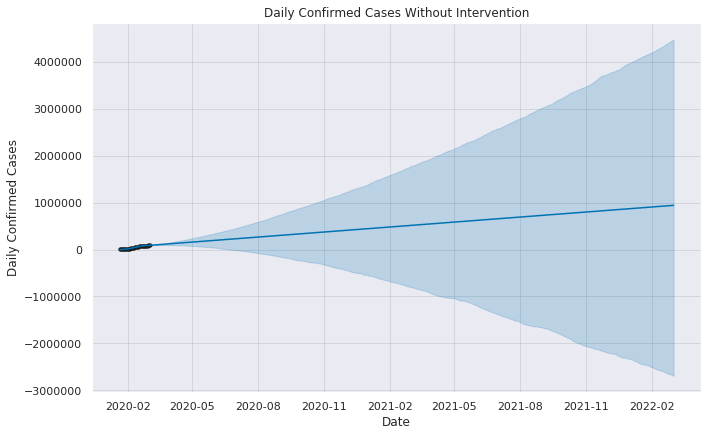

In [433]:
global_prophet.plot(global_forecast, xlabel = 'Date', ylabel = 'Daily Confirmed Cases')
plt.title('Daily Confirmed Cases Without Intervention');

In [434]:
global_prophet.changepoints[:10]

1    2020-01-22
3    2020-01-24
4    2020-01-25
5    2020-01-26
7    2020-01-28
8    2020-01-29
9    2020-01-30
11   2020-02-01
12   2020-02-02
13   2020-02-03
Name: ds, dtype: datetime64[ns]